In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
path = 'pics/DVPP2'
services = ['FCR', 'FFR', 'FFR_FCR']
# df = pd.read_csv('data/energy_provision.csv', index_col=0)
service = services[0]

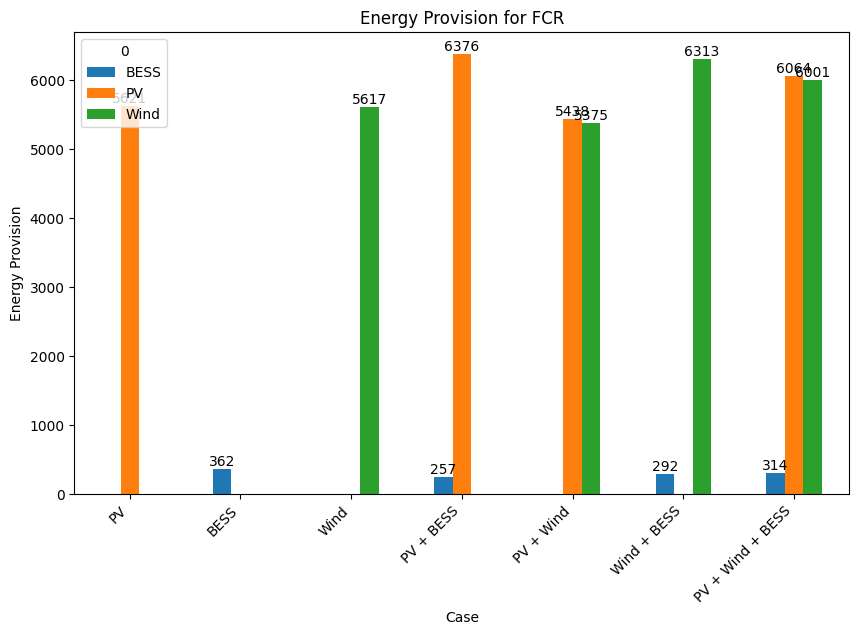

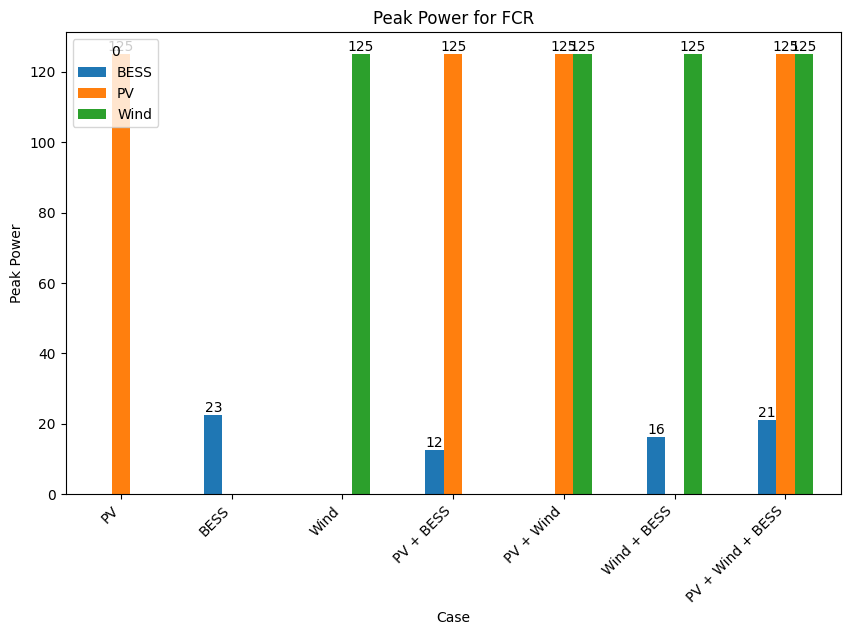

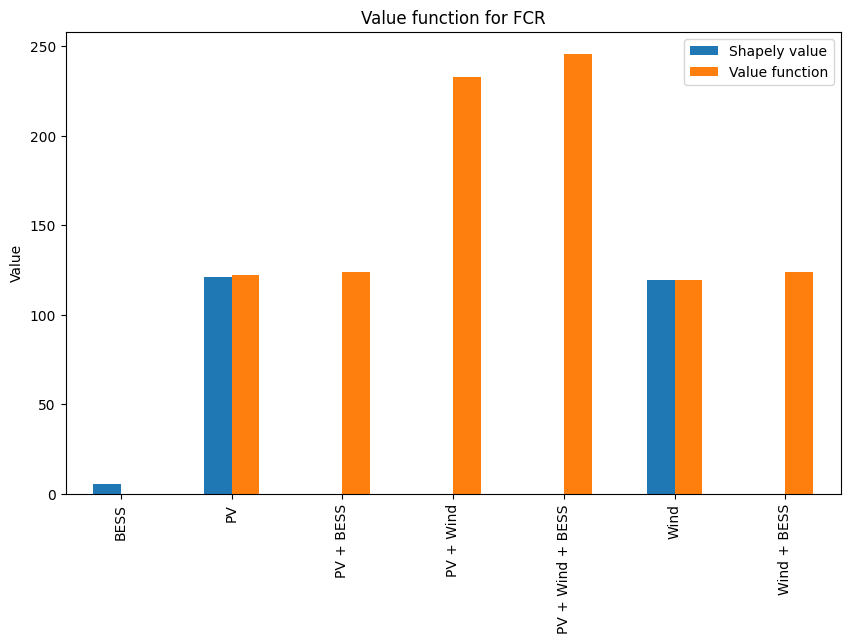

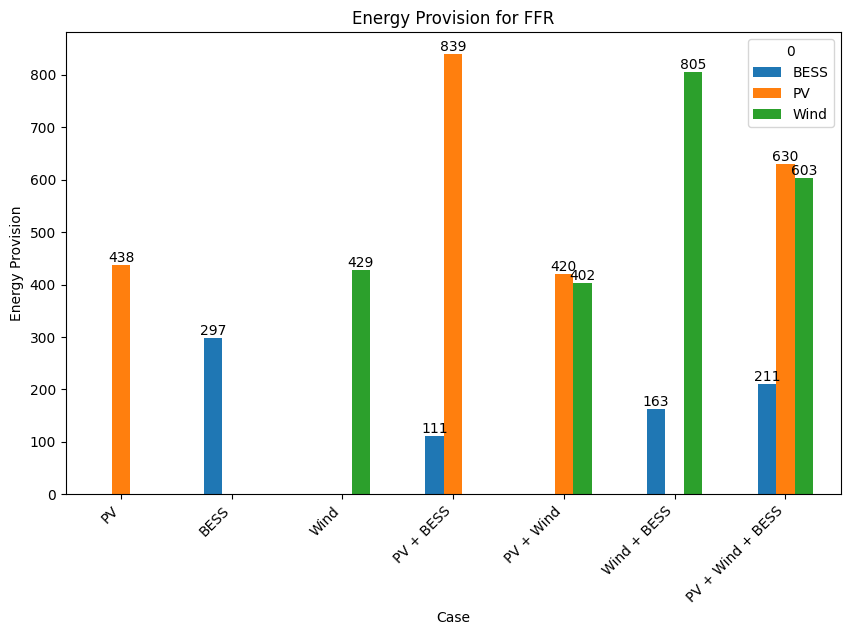

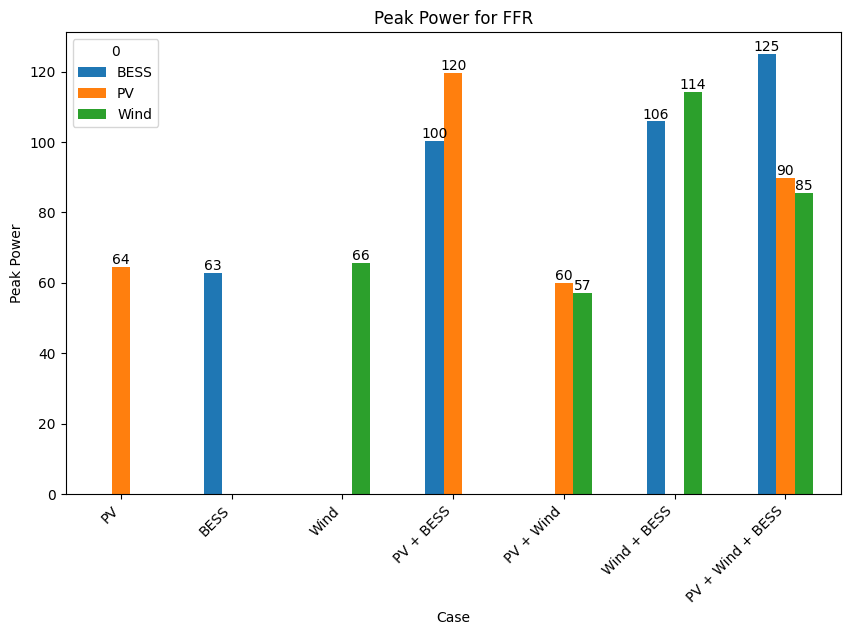

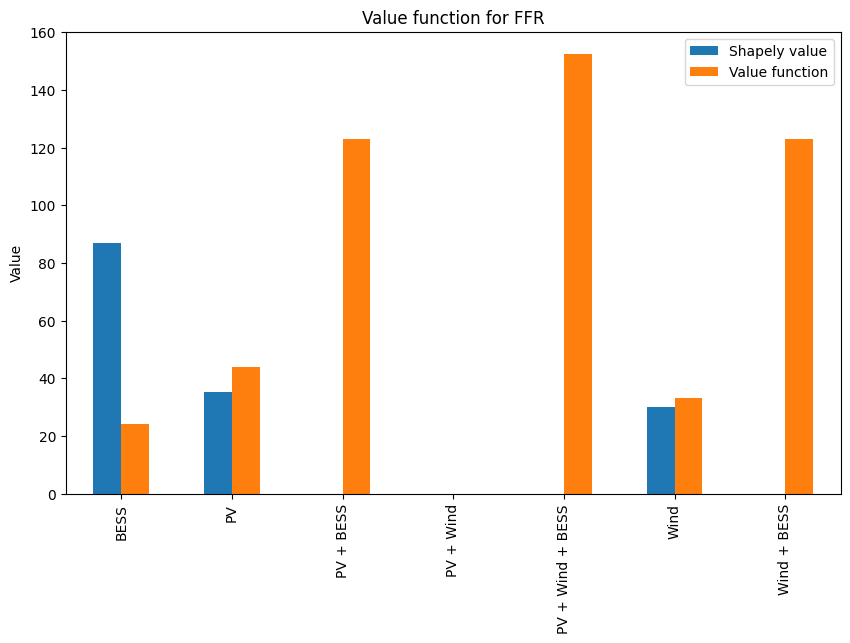

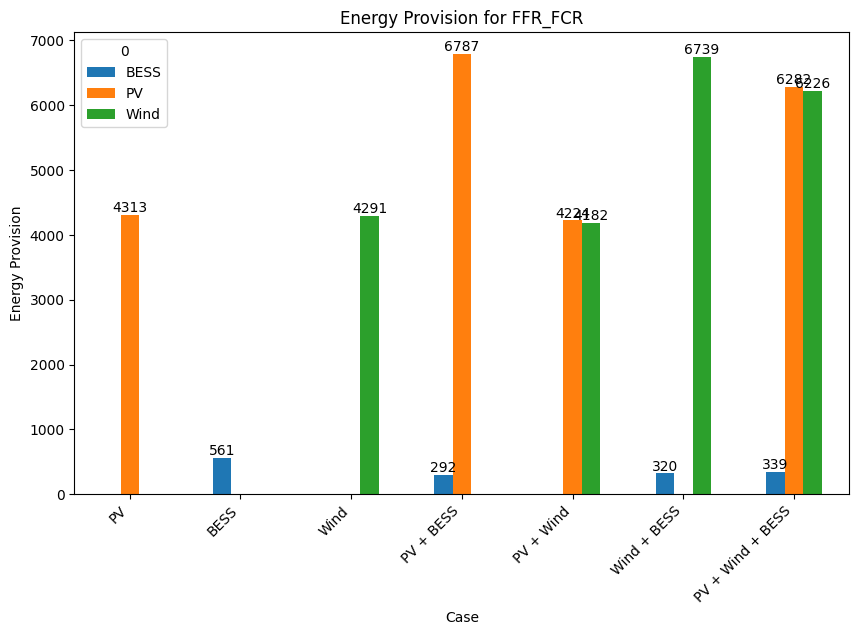

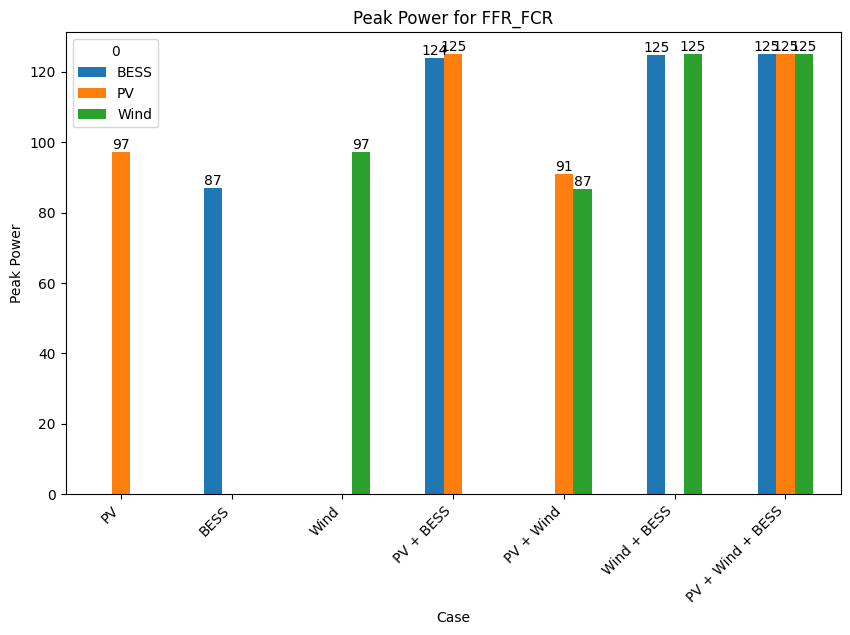

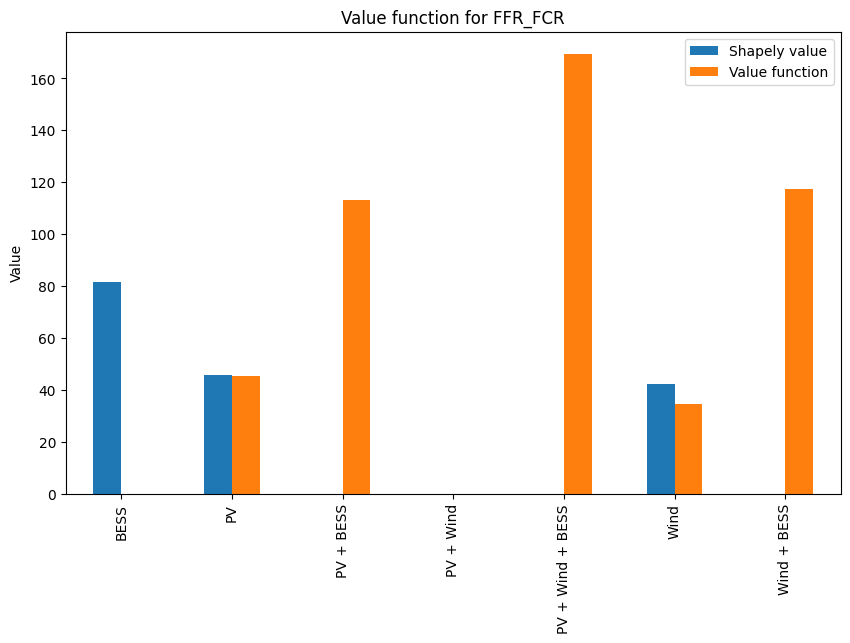

In [23]:
for service in services:
    df = pd.read_csv(f'{path}/{service}/energy_provision.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Energy Provision for {service}', ylabel='Energy Provision', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for peak power
    df = pd.read_csv(f'{path}/{service}/peak_power.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Peak Power for {service}', ylabel='Peak Power', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for reward and shapely values values
    df = pd.read_csv(f'{path}/{service}/value_function.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()

    df_2 = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()
    # merge df_2 into df where index match
    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Value function', 'Shapely value']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Value function for {service}', ylabel='Value')

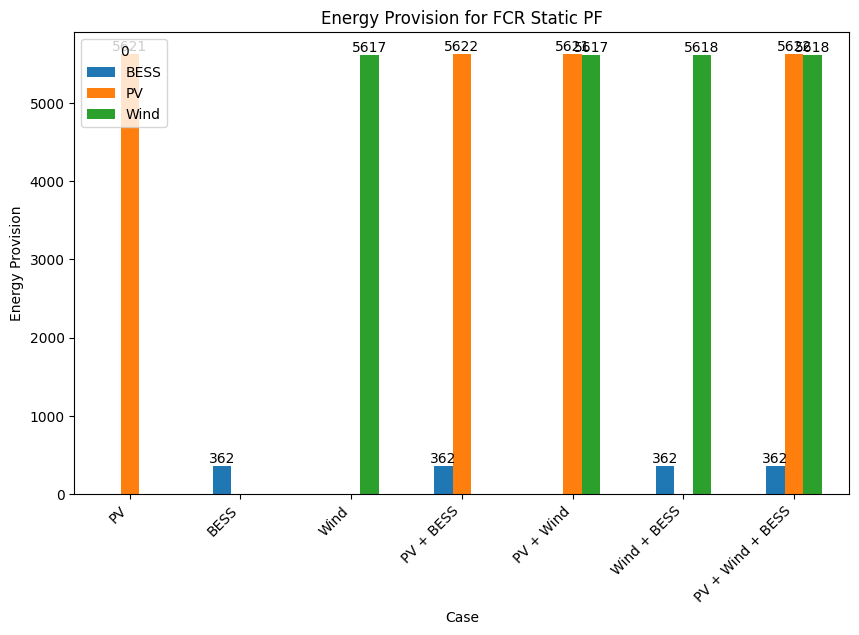

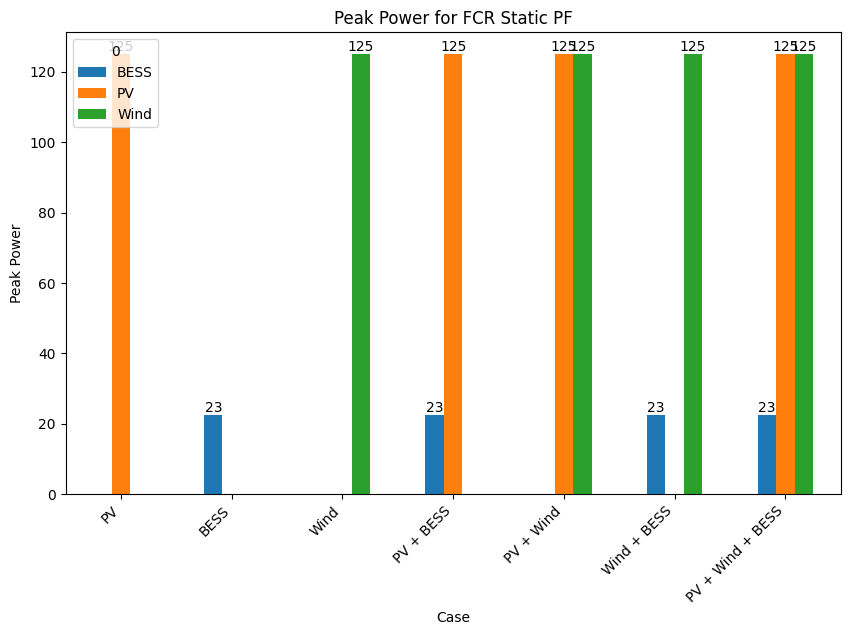

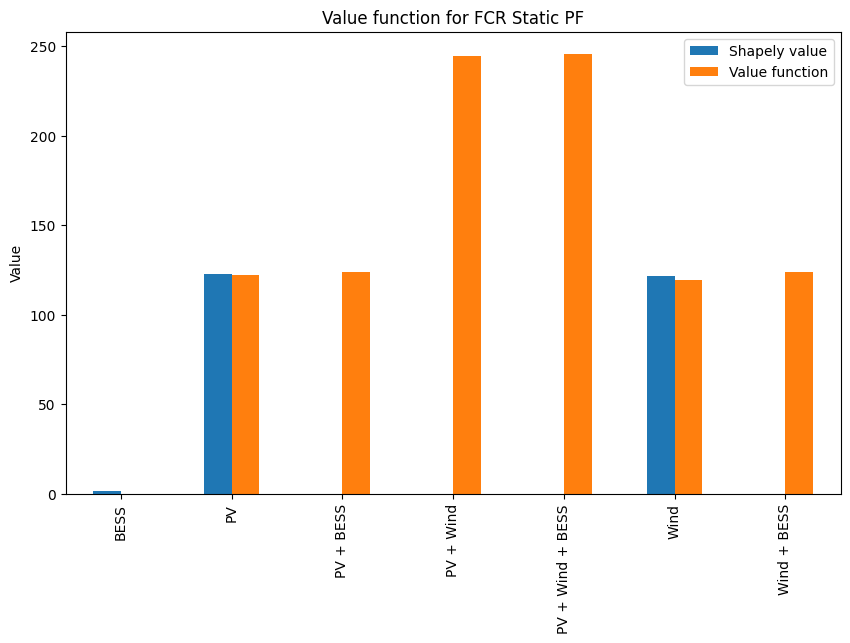

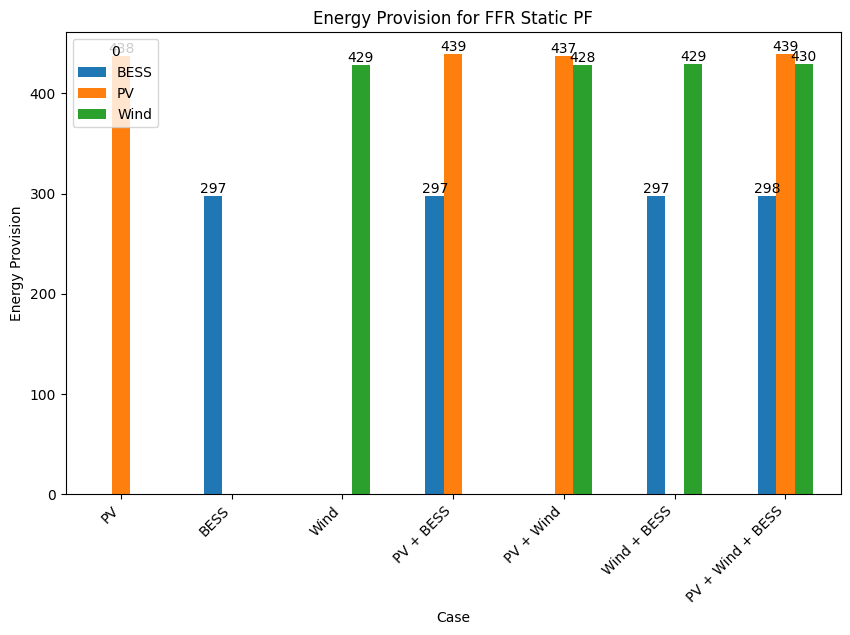

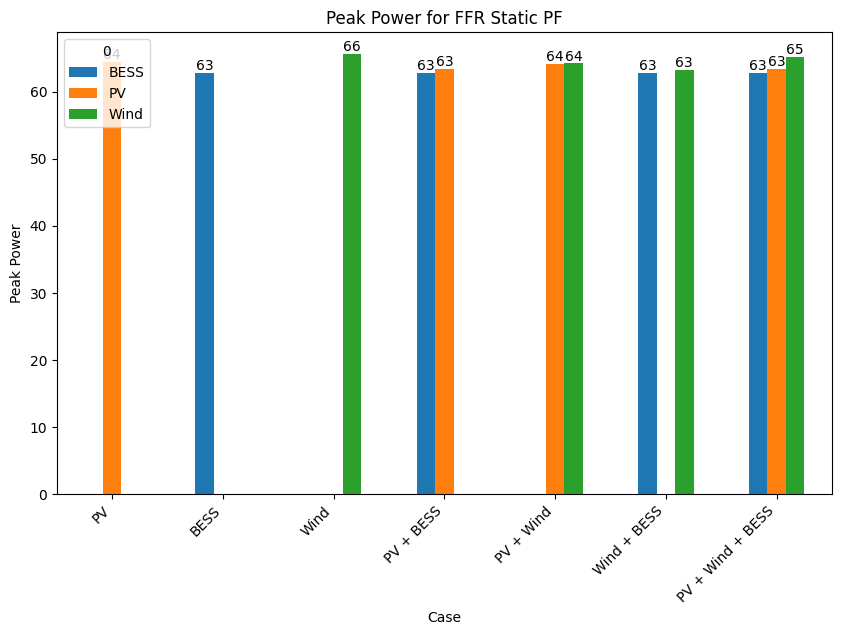

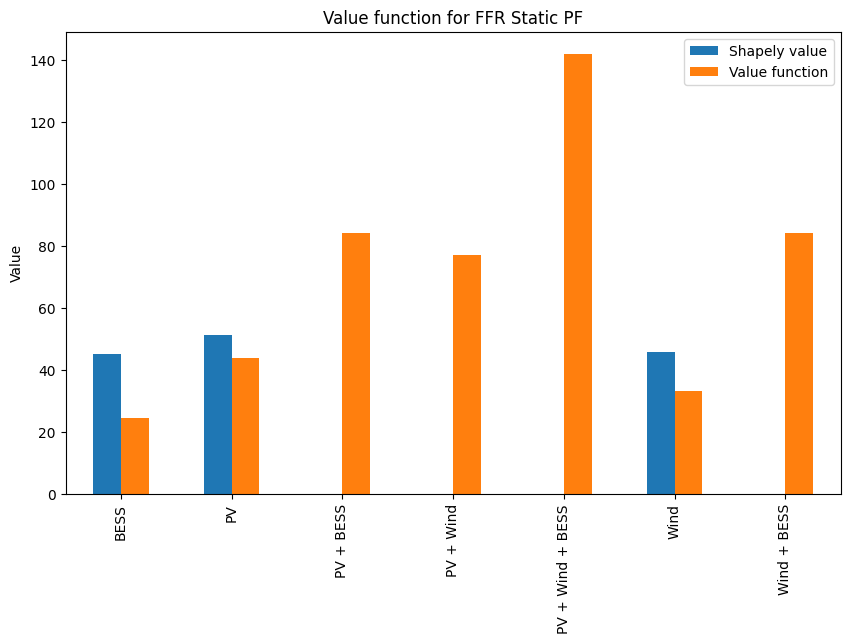

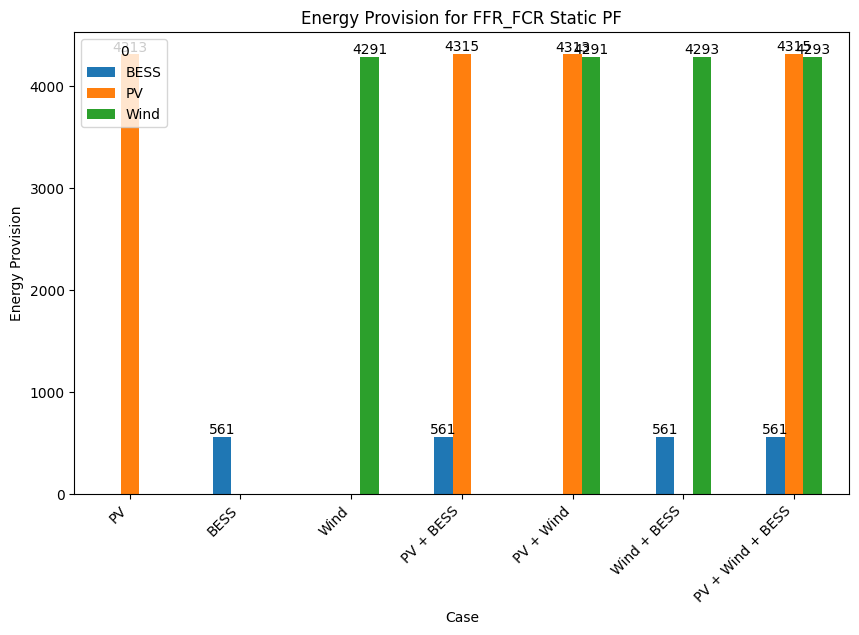

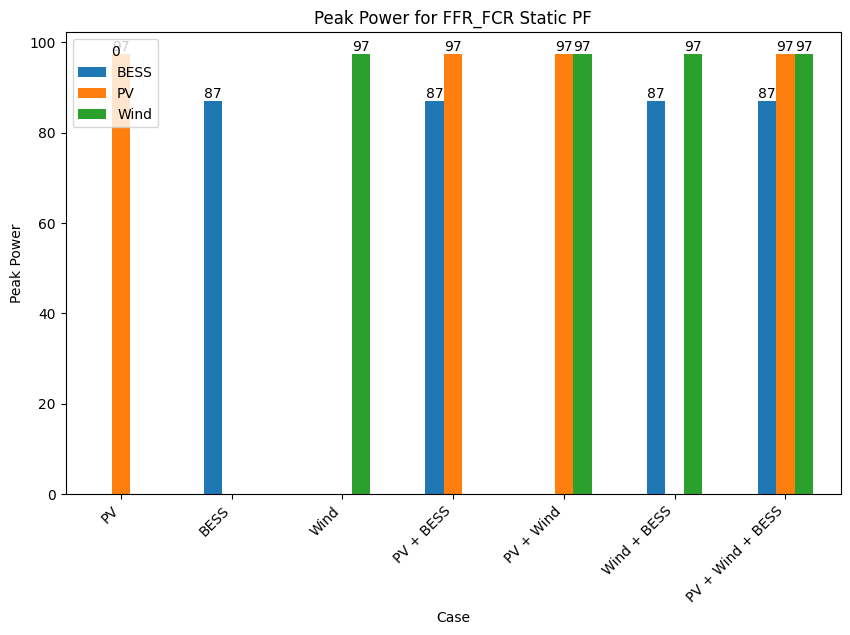

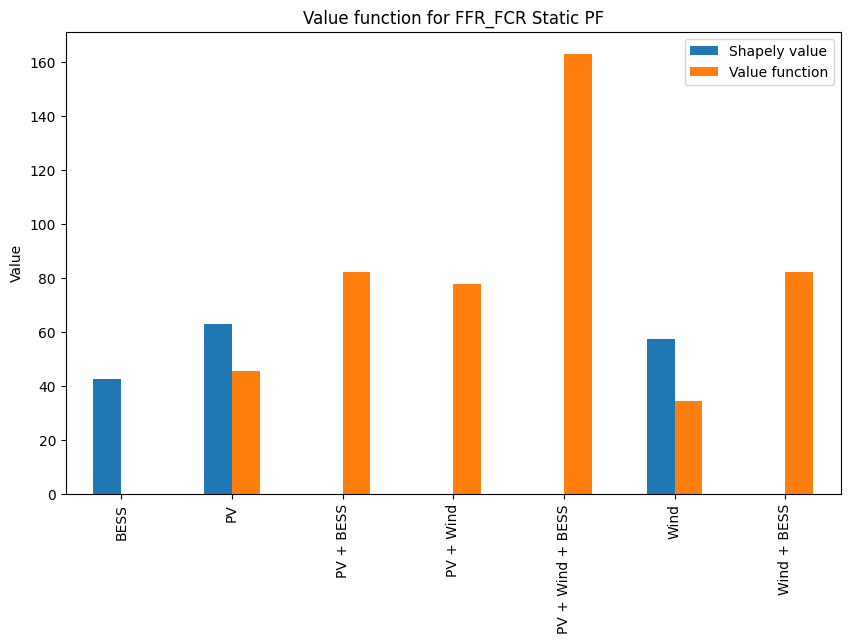

In [24]:
# do same for static pf

for service in services:
    df = pd.read_csv(f'{path}/{service}/energy_provision_static_pf.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Energy Provision for {service} Static PF', ylabel='Energy Provision', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for peak power
    df = pd.read_csv(f'{path}/{service}/peak_power_static_pf.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Peak Power for {service} Static PF', ylabel='Peak Power', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for reward and shapely values values
    df = pd.read_csv(f'{path}/{service}/value_function_static_pf.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()

    df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()
    # merge df_2 into df where index match
    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Value function', 'Shapely value']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Value function for {service} Static PF', ylabel='Value')

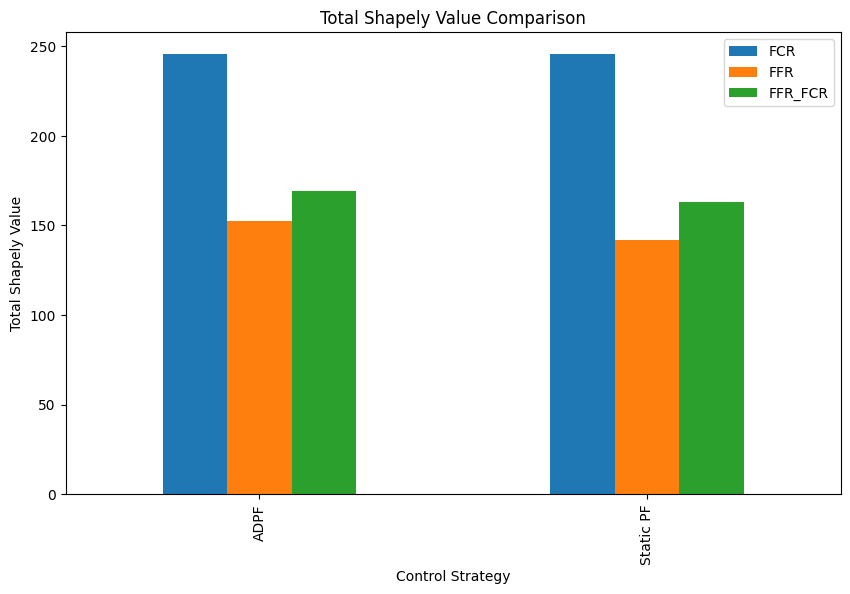

In [25]:
# compare  static pf and adpf total summed shapely value for all services
df_final = pd.DataFrame(columns=services, index=['ADPF', 'Static PF'])
for service in services:
    df = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()
    df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()

    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')

    df_final.at['ADPF', service] = df.sum(axis=0).iloc[0]
    df_final.at['Static PF', service] = df.sum(axis=0).iloc[1]

# plot df_final as grouped bar chart
ax = df_final.plot(kind='bar', figsize=(10, 6),
                   title='Total Shapely Value Comparison', ylabel='Total Shapely Value', xlabel='Control Strategy')


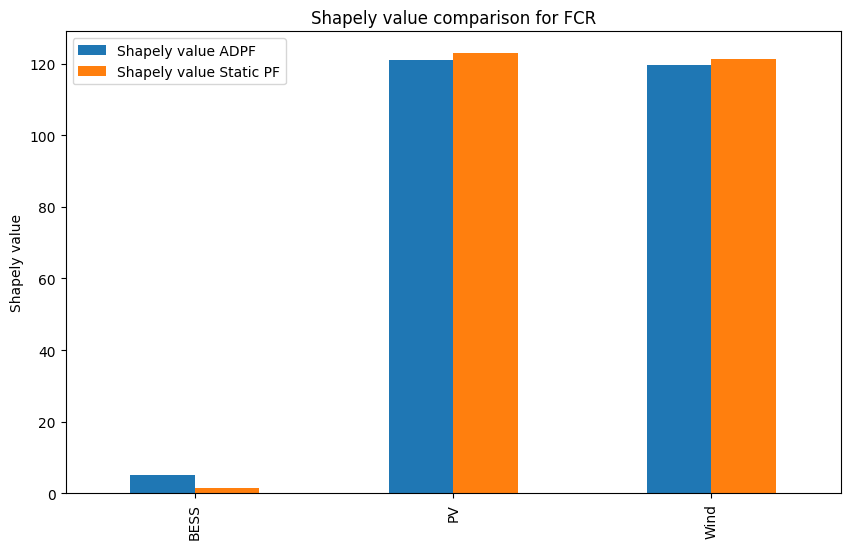

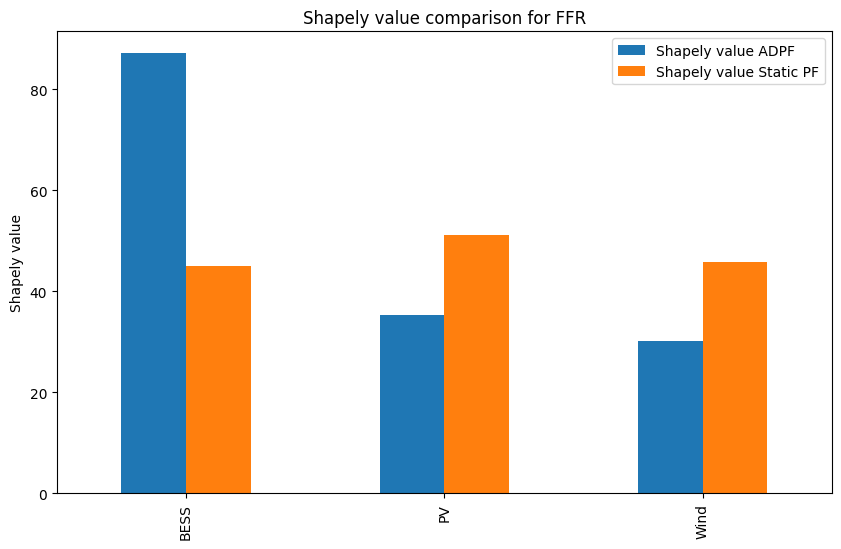

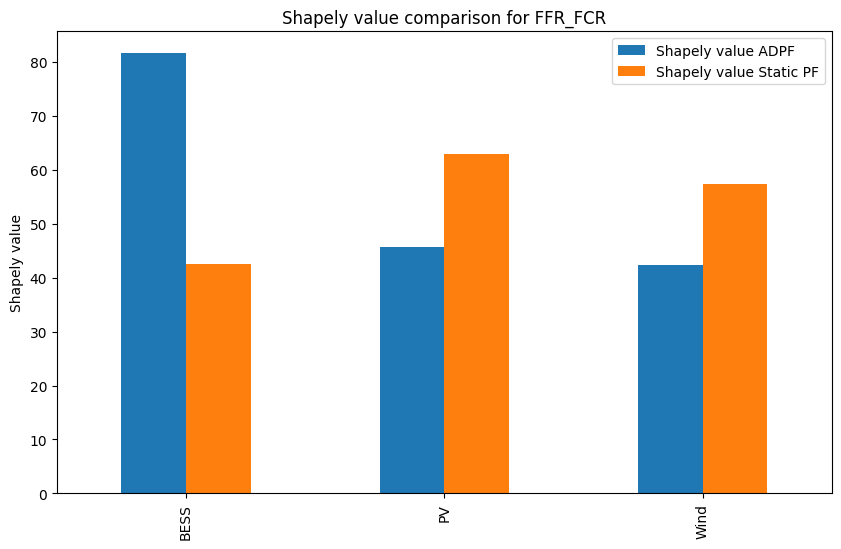

In [26]:
# compare adpf and static pf for shapely values
for service in services:
    df = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()
    df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()

    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Shapely value ADPF', 'Shapely value Static PF']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Shapely value comparison for {service}', ylabel='Shapely value')

In [27]:
import math as mt
import itertools

In [28]:
VS = {'PV': 0, 'Wind': 0, 'BESS': 0, 'SC': 0, 'PV + Wind': 0, 'PV + BESS': 1, 'PV + SC': 1, 'Wind + BESS': 1, 'Wind + SC': 0, 'BESS + SC': 0, 'PV + Wind + BESS': 1, 'PV + Wind + SC': 1.2, 'PV + BESS + SC': 1.2, 'Wind + BESS + SC': 1.2, 'PV + Wind + BESS + SC': 1.6}
VS[()] = 0  # empty coalition

In [29]:
# convert strings to tuples removing spaces and split by +
VS = {tuple(k.replace(' ', '').split('+')): v for k, v in VS.items() if type(k) is str}
VS

{('PV',): 0,
 ('Wind',): 0,
 ('BESS',): 0,
 ('SC',): 0,
 ('PV', 'Wind'): 0,
 ('PV', 'BESS'): 1,
 ('PV', 'SC'): 1,
 ('Wind', 'BESS'): 1,
 ('Wind', 'SC'): 0,
 ('BESS', 'SC'): 0,
 ('PV', 'Wind', 'BESS'): 1,
 ('PV', 'Wind', 'SC'): 1.2,
 ('PV', 'BESS', 'SC'): 1.2,
 ('Wind', 'BESS', 'SC'): 1.2,
 ('PV', 'Wind', 'BESS', 'SC'): 1.6}

In [30]:
VS[()] = 0  # ensure empty coalition is present 

In [31]:
VS

{('PV',): 0,
 ('Wind',): 0,
 ('BESS',): 0,
 ('SC',): 0,
 ('PV', 'Wind'): 0,
 ('PV', 'BESS'): 1,
 ('PV', 'SC'): 1,
 ('Wind', 'BESS'): 1,
 ('Wind', 'SC'): 0,
 ('BESS', 'SC'): 0,
 ('PV', 'Wind', 'BESS'): 1,
 ('PV', 'Wind', 'SC'): 1.2,
 ('PV', 'BESS', 'SC'): 1.2,
 ('Wind', 'BESS', 'SC'): 1.2,
 ('PV', 'Wind', 'BESS', 'SC'): 1.6,
 (): 0}

In [32]:
my_names = ['PV', 'Wind', 'BESS', 'SC']

In [33]:
def get_shapely_value(v: dict, players: list) -> dict:
    """
    Shapley value calculation for a coalition game.

    v: Characteristic function of the game, must be defined for EVERY coalition
        {tuple -> float}
    players: list of players
    """
    # initialize with zero value
    shapley_values = {p: 0 for p in players}  
    n = len(players)
    # iterate over all coalitions
    for c_size in range(1, len(players) + 1):  # iterate over coalition sizes
        for subset in itertools.combinations(players, c_size):  # get all coalitions of size c_size
            k = len(subset)
            for p in subset:  # iterate over player in coalition and change their shapely value
                subset_wo_p = tuple(c for c in subset if c != p)
                if subset_wo_p not in v:
                    print(f"Warning: Coalition {subset_wo_p} not in characteristic function. Assuming value 0.")
                marginal_contribution = v.get(subset) - v.get(subset_wo_p, 0)
                shapley_values[p] += marginal_contribution * mt.factorial(k - 1) * mt.factorial(n - k) / mt.factorial(n)

    return shapley_values

In [34]:
get_shapely_value(VS, my_names)

{'PV': 0.4666666666666667,
 'Wind': 0.30000000000000004,
 'BESS': 0.4666666666666667,
 'SC': 0.3666666666666667}